In [1]:
from keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [3]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


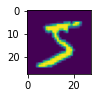

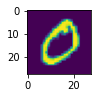

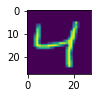

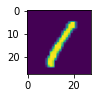

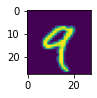

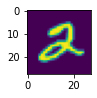

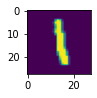

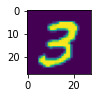

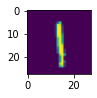

In [4]:
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(train_X[i])
    plt.show()

In [5]:
# Normalisation
train_X = train_X.astype('float32') 
test_X = test_X.astype('float32')

train_X = train_X/255.0
test_X = test_X/255.0

# Reshaping
train_X = train_X.reshape(len(train_X),-1)
test_X = test_X.reshape(len(test_X),-1)

In [6]:
digit_count = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
final_X = []
final_Y = []
for i in range(train_X.shape[0]):
    if digit_count[train_y[i]] < 100:
        final_X.append(train_X[i])
        final_Y.append(train_y[i])
        digit_count[train_y[i]]+=1
    if sum(digit_count) == 1000:
        break
        
# This makes N = 1000 and n = 28x28 = 784

In [7]:
# CASE (i) Random Initialisation of clusters to any point
# (a)
from random import random
from sklearn.cluster import KMeans
clusters = []

for i in range(20):
    centre = []
    for j in range(28*28):
        centre.append(random())
    clusters.append(centre)
clusters = np.array(clusters)
km = KMeans(n_clusters=20, max_iter=50, n_init=1, init = clusters)
km = km.fit(final_X)

In [8]:
# Number of iterations
km.n_iter_

31

In [9]:
centroids = km.cluster_centers_
centroids = centroids.reshape(20,28,28)

The cluster representatives are: 


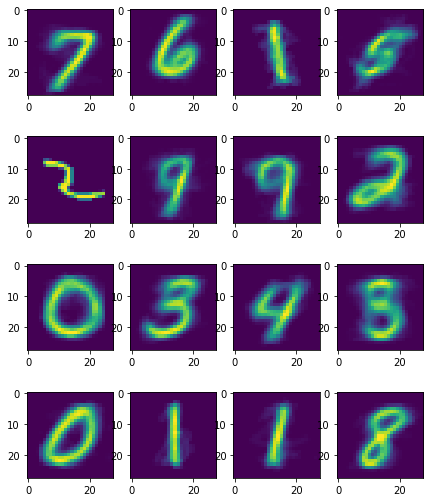

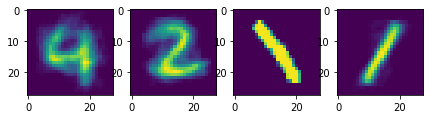

In [10]:
print("The cluster representatives are: ")

plt.figure(figsize = (10,9))
bottom = 0.35
for i in range(16):
     plt.subplots_adjust(bottom)
     plt.subplot(4,4,i+1)
     plt.imshow(centroids[i]*255)

plt.figure(figsize = (10,9))
bottom = 0.35
for i in range(16, 20):
     plt.subplots_adjust(bottom)
     plt.subplot(4,4,i+1-16)
     plt.imshow(centroids[i])

In [19]:
# (b) 
# This is hard coded
labels = {0: 7,
          1: 6,
          2: 1,
          3: 5,
          4: 2,
          5: 9,
          6: 9,
          7: 2,
          8: 0,
          9: 3,
          10: 4,
          11: 3,
          12: 0,
          13: 1,
          14: 1,
          15: 8,
          16: 4,
          17: 2,
          18: 1,
          19: 1}

final_test_X = test_X[:50]
final_test_y = test_y[:50]

In [20]:
final_test_X = np.array(final_test_X, dtype=np.float)
test_labels = km.predict(final_test_X)
test_labels

array([ 0, 17, 14, 12, 16, 14,  5,  6, 16,  0,  8, 17, 10,  8, 13, 11,  6,
        6, 11,  6,  0, 11, 16,  9, 16, 12,  6, 10, 12,  2, 11,  2, 11, 16,
        0,  7,  6, 13, 11, 14, 13,  5,  6, 14,  2, 11,  2,  3,  6, 16])

In [21]:
for i in range(len(test_labels)):
    test_labels[i] = labels[test_labels[i]]
test_labels

array([7, 2, 1, 0, 4, 1, 9, 9, 4, 7, 0, 2, 4, 0, 1, 3, 9, 9, 3, 9, 7, 3,
       4, 3, 4, 0, 9, 4, 0, 1, 3, 1, 3, 4, 7, 2, 9, 1, 3, 1, 1, 9, 9, 1,
       1, 3, 1, 5, 9, 4])

In [58]:
error = 0
for i in range(50):
    if test_labels[i] != final_test_y[i]:
        error +=1
print("Accuracy = ", (50-error)/50*100, "%")

Accuracy =  56.00000000000001 %


Text(0, 0.5, 'j_clust')

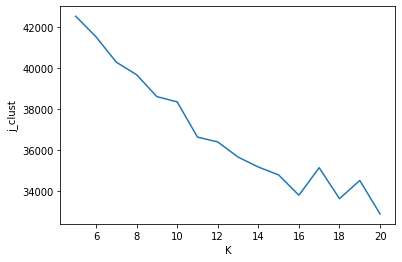

In [23]:
# (c)
j_clust = []
K = [i for i in range(5, 21)]
for k in range(5, 21):
    
    clusters = []
    for i in range(k):
        centre = []
        for j in range(28*28):
            centre.append(random())
        clusters.append(centre)
    clusters = np.array(clusters)
    
    km = KMeans(n_clusters=k, max_iter=50, n_init=1, init = clusters)
    km.fit(final_X)
    j_clust.append(km.inertia_)
plt.plot(K, j_clust)
plt.xlabel("K")
plt.ylabel("j_clust")

In [24]:
# The optimal number of clusters is the one with the least value of j_clust. Here it is 20

In [41]:
# CASE (ii) Choose cluster representatives from the given data set
# (a)
from sklearn.cluster import KMeans
km = KMeans(n_clusters=20, max_iter=50, n_init=1, init = 'random')
km = km.fit(final_X)

In [42]:
# Number of iterations
km.n_iter_

13

In [43]:
centroids = km.cluster_centers_
centroids = centroids.reshape(20,28,28)

The cluster representatives are: 


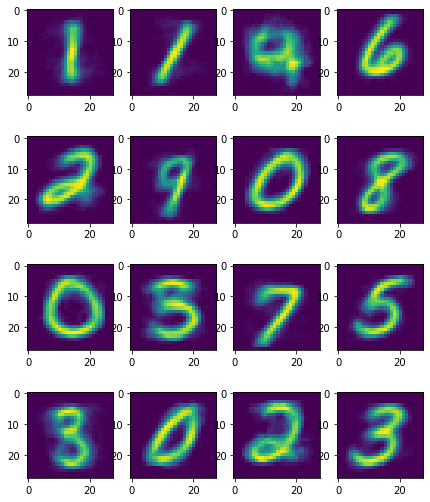

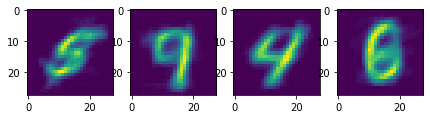

In [44]:
print("The cluster representatives are: ")

plt.figure(figsize = (10,9))
bottom = 0.35
for i in range(16):
     plt.subplots_adjust(bottom)
     plt.subplot(4,4,i+1)
     plt.imshow(centroids[i]*255)

plt.figure(figsize = (10,9))
bottom = 0.35
for i in range(16, 20):
     plt.subplots_adjust(bottom)
     plt.subplot(4,4,i+1-16)
     plt.imshow(centroids[i])

In [45]:
# (b) 
# This is hard coded
labels = {0: 1,
          1: 1,
          2: 4,
          3: 6,
          4: 2,
          5: 9,
          6: 0,
          7: 8,
          8: 0,
          9: 3,
          10: 7,
          11: 5,
          12: 3,
          13: 0,
          14: 2,
          15: 3,
          16: 5,
          17: 9,
          18: 4,
          19: 6}

final_test_X = test_X[:50]
final_test_y = test_y[:50]

In [46]:
final_test_X = np.array(final_test_X, dtype = np.float)
test_labels = km.predict(final_test_X)
test_labels

array([10, 12,  0,  6, 17,  1, 17, 17,  2, 10,  8,  2, 17,  8,  0, 12, 17,
       17,  9, 17,  5, 19,  2, 11, 17,  6, 17, 17,  6,  0, 12,  0, 12,  2,
       10, 14, 17,  0, 12,  0,  0,  5, 17,  0,  0, 11, 12, 16, 17,  2])

In [47]:
for i in range(len(test_labels)):
    test_labels[i] = labels[test_labels[i]]
test_labels

array([7, 3, 1, 0, 9, 1, 9, 9, 4, 7, 0, 4, 9, 0, 1, 3, 9, 9, 3, 9, 9, 6,
       4, 5, 9, 0, 9, 9, 0, 1, 3, 1, 3, 4, 7, 2, 9, 1, 3, 1, 1, 9, 9, 1,
       1, 5, 3, 5, 9, 4])

In [57]:
error = 0
for i in range(50):
    if test_labels[i] != final_test_y[i]:
        error +=1
print("Accuracy = ", (50-error)/50*100, "%")

Accuracy =  56.00000000000001 %


Text(0, 0.5, 'j_clust')

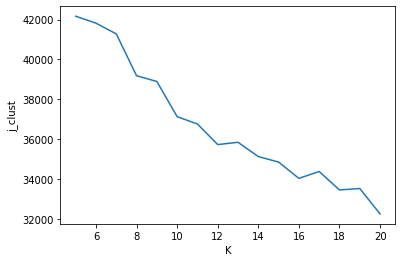

In [55]:
# (c)
j_clust = []
K = [i for i in range(5, 21)]
for k in range(5, 21):
    
    clusters = []
    for i in range(k):
        centre = []
        for j in range(28*28):
            centre.append(random())
        clusters.append(centre)
    clusters = np.array(clusters)
    
    km = KMeans(n_clusters=k, max_iter=50, n_init=1, init = clusters)
    km.fit(final_X)
    j_clust.append(km.inertia_)
plt.plot(K, j_clust)
plt.xlabel("K")
plt.ylabel("j_clust")

In [56]:
# The optimal number of clusters is the one with the least value of j_clust. Here it is 20

In [59]:
# Here the choice of the initial condition did not have any special effect on the performance of the algorithm,
# as in both the cases, the accuracy was the same
# But when we see the clustering using cluster representatives from the given data set, the value of j_clust decreases
# rather smoothly (with increase in the number of clusters), as opposed to the case when the clustering is done using 
# random initialisation.